 ## Ford GoBike System Data exploration project
#### BY Oriola Timilehin

## Table of Contents
 - Introduction
     - Data Description
     - Questions to be answered by analysis
 - Data Wrangling
     - Data Gathering
     - Data Assessing
     - Data Cleaning
     - Data Storage
 - Exploratory Data Analysis
     - Univariate Exploration
     - Bivariate Exploration
     - MultiVariate Exploration
 - Conclusion

 ## Introduction

 ### Data Description
 - This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

## Questions for Analysis
  - Which day of the week has the most trips?
  - The top 10 Start Station with the most Rides?
  - The top 10 Start Station with the least Rides?
  - The top 10 End Station with the most Rides?
  - The top 10 End Station with the least Rides?
  - The most bicycle service users?
  - How long does the average trip takes?

## Data Wrangling

 ### Data Gathering

In [1]:
#Importing important packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
#Loading the dataset into pandas
df = pd.read_csv('201902-fordgobike-tripdata.csv')

## Data Assessing

In [3]:
#Checking the first five row and checking in transpose form
df.head().T

,0,1,2,3,4
duration_sec,52185,42521,61854,36490,1585
start_time,2019-02-28 17:32:10.1450,2019-02-28 18:53:21.7890,2019-02-28 12:13:13.2180,2019-02-28 17:54:26.0100,2019-02-28 23:54:18.5490
end_time,2019-03-01 08:01:55.9750,2019-03-01 06:42:03.0560,2019-03-01 05:24:08.1460,2019-03-01 04:02:36.8420,2019-03-01 00:20:44.0740
start_station_id,21.0,23.0,86.0,375.0,7.0
start_station_name,Montgomery St BART Station (Market St at 2nd St),The Embarcadero at Steuart St,Market St at Dolores St,Grove St at Masonic Ave,Frank H Ogawa Plaza
start_station_latitude,37.789625,37.791464,37.769305,37.774836,37.804562
start_station_longitude,-122.400811,-122.391034,-122.426826,-122.446546,-122.271738
end_station_id,13.0,81.0,3.0,70.0,222.0
end_station_name,Commercial St at Montgomery St,Berry St at 4th St,Powell St BART Station (Market St at 4th St),Central Ave at Fell St,10th Ave at E 15th St
end_station_latitude,37.794231,37.77588,37.786375,37.773311,37.792714


In [4]:
#Checking the rows randomly
df.sample(5).T

,43085,87775,80648,40442,154838
duration_sec,661,360,205,487,724
start_time,2019-02-22 16:56:13.9080,2019-02-16 22:44:21.9110,2019-02-18 15:14:12.5440,2019-02-22 20:47:38.5560,2019-02-06 09:14:50.2970
end_time,2019-02-22 17:07:15.5140,2019-02-16 22:50:22.4420,2019-02-18 15:17:37.5970,2019-02-22 20:55:46.5350,2019-02-06 09:26:55.1380
start_station_id,30.0,74.0,256.0,266.0,139.0
start_station_name,San Francisco Caltrain (Townsend St at 4th St),Laguna St at Hayes St,Hearst Ave at Euclid Ave,Parker St at Fulton St,Garfield Square (25th St at Harrison St)
start_station_latitude,37.776598,37.776435,37.875112,37.862464,37.751017
start_station_longitude,-122.395282,-122.426244,-122.260553,-122.264791,-122.411901
end_station_id,23.0,97.0,244.0,245.0,58.0
end_station_name,The Embarcadero at Steuart St,14th St at Mission St,Shattuck Ave at Hearst Ave,Downtown Berkeley BART,Market St at 10th St
end_station_latitude,37.791464,37.768265,37.873676,37.870139,37.776619


In [5]:
# Checking the attributes of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
#Checking the shape of our dataset
df.shape

(183412, 16)

In [7]:
#Checking for duplicates in our dataset
df.duplicated().sum()

0

In [8]:
#Checking for unique values
df.nunique()

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

In [9]:
#Checking for null values
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [10]:
# Checking the count of our member_gender
df['member_gender'].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [11]:
#Checking the summary statistics excluding numbers 
df.describe(exclude = 'number').T

,count,unique,top,freq
start_time,183412,183401,2019-02-25 08:52:07.5820,2
end_time,183412,183397,2019-02-11 08:03:22.6020,2
start_station_name,183215,329,Market St at 10th St,3904
end_station_name,183215,329,San Francisco Caltrain Station 2 (Townsend St...,4857
user_type,183412,2,Subscriber,163544
member_gender,175147,3,Male,130651
bike_share_for_all_trip,183412,2,No,166053


In [12]:
#Checking the summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration_sec,183412.0,726.078435,1794.389780,61.000000,325.000000,514.000000,796.000000,85444.000000
start_station_id,183215.0,138.590427,111.778864,3.000000,47.000000,104.000000,239.000000,398.000000
start_station_latitude,183412.0,37.771223,0.099581,37.317298,37.770083,37.780760,37.797280,37.880222
start_station_longitude,183412.0,-122.352664,0.117097,-122.453704,-122.412408,-122.398285,-122.286533,-121.874119
end_station_id,183215.0,136.249123,111.515131,3.000000,44.000000,100.000000,235.000000,398.000000
end_station_latitude,183412.0,37.771427,0.099490,37.317298,37.770407,37.781010,37.797320,37.880222
end_station_longitude,183412.0,-122.352250,0.116673,-122.453704,-122.411726,-122.398279,-122.288045,-121.874119
bike_id,183412.0,4472.906375,1664.383394,11.000000,3777.000000,4958.000000,5502.000000,6645.000000
member_birth_year,175147.0,1984.806437,10.116689,1878.000000,1980.000000,1987.000000,1992.000000,2001.000000


 ### After assessing the following issues were observed:
 #### Quality
 - The duration_sec is in sec, it should be converted to minutes and rename to duration_min and check for outliers
 - Missing rows like start_station_id, start_station_name, end_station_id, and end_station_name, member_birth_year and member_gender should be dropped
 - The datatype of bike_id, start_station_id and end_station_id should be object
 - The user_type and member_gender should be changed to categorical data
 - Start_time and end_time will be changed to datetime datatype
 - The member_birth_year should be int64
 - The member_birth_year can be used to create a column for member_age which can be of great use for analysis and check for outliers
 #### Tidiness
 - Day, Month and Year should be extracted from the start_time and end_time into a separate column

 ## Data Cleaning

In [13]:
#Creating a copy of the dataset before cleaning commences
FGS_clean_df = df.copy()

 ### Quality
 - The duration_sec is in sec, it should be converted to minutes and rename to duration_min and check for outliers

 ### Define
 - The duration_sec should be converted to minutes, renamed and checked for outliers

 ### Code

In [14]:
#Converting to minutes
FGS_clean_df['duration_sec'] = FGS_clean_df['duration_sec']/60
FGS_clean_df.rename(columns = {'duration_sec': 'duration_min'}, inplace=True)

 ### Test

In [15]:
#Checking if it was properly converted
FGS_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_min             183412 non-null  float64
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [16]:
#Checking for outliers
Long_trip = FGS_clean_df['duration_min'].quantile(.99)
FGS_clean_df = FGS_clean_df[FGS_clean_df['duration_min'] <= Long_trip]

 ### Test

In [17]:
#Checking if code ran properly
FGS_clean_df.describe()

,duration_min,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,181577.000000,181384.000000,181577.000000,181577.000000,181384.000000,181577.000000,181577.000000,181577.000000,173644.000000
mean,10.361683,138.493599,37.771182,-122.352444,135.993483,37.771377,-122.352014,4475.146208,1984.810843
std,7.384983,111.509893,0.099736,0.117209,111.153758,0.099636,0.116770,1662.852455,10.115064
min,1.016667,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,5.383333,47.000000,37.770083,-122.411901,44.000000,37.770407,-122.411726,3786.000000,1980.000000
50%,8.500000,104.000000,37.780760,-122.398285,100.000000,37.780955,-122.397437,4958.000000,1987.000000
75%,13.066667,239.000000,37.797280,-122.285171,233.000000,37.797320,-122.288045,5502.000000,1992.000000
max,57.633333,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


 ###  Quality
   - Missing rows like start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year, and member_gender should be dropped

 ### Define
 - Create a function to remove missing rows like start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year, and member_gender  

 ### Code

In [18]:
#Getting the rows with null values
Drop = FGS_clean_df[FGS_clean_df['start_station_id'].isnull()].index
#Creating a function to drop the columns
def drop_rows_cols(dframe, rows_cols, axis=0):
    dframe.drop(rows_cols, axis=axis, inplace=True)
    
drop_rows_cols(FGS_clean_df, Drop)

 ### Test

In [19]:
FGS_clean_df.isnull().sum()

duration_min                  0
start_time                    0
end_time                      0
start_station_id              0
start_station_name            0
start_station_latitude        0
start_station_longitude       0
end_station_id                0
end_station_name              0
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          7931
member_gender              7931
bike_share_for_all_trip       0
dtype: int64

 ### Code

In [20]:
#Dropping the member_birth_year by identifying the rows and calling the function created above to drop it
Drop_gen = FGS_clean_df[FGS_clean_df['member_birth_year'].isnull()].index
drop_rows_cols(FGS_clean_df, Drop_gen)

 ### Test

In [21]:
FGS_clean_df.isnull().sum()

duration_min               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

  ### Quality
 - The datatype of bike_id, start_station_id and end_station_id should be object
 - The user_type and member_gender should be changed to categorical data
 - Start_time and end_time will be changed to datetime datatype
 - The member_birth_year should be int64

 ### Define
 #### The following should be changed to their respective datatypes:
   - The datatype of bike_id, start_station_id and end_station_id should be object
   - The user_type and member_gender should be changed to categorical data
   - Start_time and end_time will be changed to datetime datatype
   - The member_birth_year should be int64

 ### Code

In [22]:
# Creating a dictionary of the columns whose datatypes need changing
correct_dtype= {'start_time': 'datetime64', 
                'end_time': 'datetime64',
                'start_station_id': 'object',
                'end_station_id': 'object',
                'bike_id': 'object',
               'user_type': 'category',
               'member_gender': 'category',
               'member_birth_year' : 'int64'}
FGS_clean_df = FGS_clean_df.astype(correct_dtype)

 ### Test

In [23]:
#Checking if code ran properly
FGS_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173453 entries, 4 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_min             173453 non-null  float64       
 1   start_time               173453 non-null  datetime64[ns]
 2   end_time                 173453 non-null  datetime64[ns]
 3   start_station_id         173453 non-null  object        
 4   start_station_name       173453 non-null  object        
 5   start_station_latitude   173453 non-null  float64       
 6   start_station_longitude  173453 non-null  float64       
 7   end_station_id           173453 non-null  object        
 8   end_station_name         173453 non-null  object        
 9   end_station_latitude     173453 non-null  float64       
 10  end_station_longitude    173453 non-null  float64       
 11  bike_id                  173453 non-null  object        
 12  user_type       

 ### Quality
 - The member_birth_year can be used to create a column for member_age which can be of great use for analysis and check for outliers

 ### Define
 - Create a member age column from member_birth_year and remove outliers

 ### Code

In [24]:
#Creating the column of member_age 
FGS_clean_df['member_age'] = 2019 - FGS_clean_df['member_birth_year']

 ### Test

In [25]:
FGS_clean_df.sample(5)

,duration_min,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
3247,24.250000,2019-02-28 17:09:14.188,2019-02-28 17:33:29.961,8.0,The Embarcadero at Vallejo St,37.799953,-122.398525,364.0,China Basin St at 3rd St,37.772000,-122.389970,6400,Customer,1997,Female,No,22
28868,6.033333,2019-02-25 08:17:31.755,2019-02-25 08:23:34.335,41.0,Golden Gate Ave at Polk St,37.781270,-122.418740,75.0,Market St at Franklin St,37.773793,-122.421239,4399,Subscriber,1964,Female,No,55
117613,9.483333,2019-02-11 20:54:16.402,2019-02-11 21:03:45.572,98.0,Valencia St at 16th St,37.765052,-122.421866,145.0,29th St at Church St,37.743684,-122.426806,5008,Subscriber,1988,Male,No,31
41517,22.916667,2019-02-22 18:12:04.779,2019-02-22 18:35:00.258,25.0,Howard St at 2nd St,37.787522,-122.397405,137.0,Jersey St at Castro St,37.750506,-122.433950,6098,Subscriber,1997,Male,No,22
136614,16.400000,2019-02-08 09:25:30.933,2019-02-08 09:41:55.469,134.0,Valencia St at 24th St,37.752428,-122.420628,49.0,S Park St at 3rd St,37.780760,-122.394989,5524,Subscriber,1984,Male,No,35


 ### Code

In [26]:
#Removing outliers
out_of_range_age =FGS_clean_df['member_age'].quantile(.95)
FGS_clean_df = FGS_clean_df[FGS_clean_df['member_age'] <= out_of_range_age]

 ### Test

In [27]:
#Checking to test our code
FGS_clean_df.describe()

,duration_min,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,member_age
count,165630.000000,165630.000000,165630.000000,165630.000000,165630.000000,165630.000000,165630.000000
mean,10.223938,37.771026,-122.351305,37.771212,-122.350844,1986.113470,32.886530
std,7.223659,0.101037,0.118252,0.100934,0.117795,8.151881,8.151881
min,1.016667,37.317298,-122.453704,37.317298,-122.453704,1964.000000,18.000000
25%,5.350000,37.770407,-122.411901,37.770407,-122.411647,1981.000000,27.000000
50%,8.416667,37.780760,-122.398279,37.781010,-122.397405,1988.000000,31.000000
75%,12.916667,37.797320,-122.281193,37.797673,-122.283282,1992.000000,38.000000
max,57.616667,37.880222,-121.874119,37.880222,-121.874119,2001.000000,55.000000


  #### Tidiness
 - Day, Month and Year should be extracted from the start_time and end_time into a separate column

 ### Define
-  Split the start_time column into Day, Month, and Year column

 ### Code

In [28]:
#Creating the column for the day
FGS_clean_df['day'] = FGS_clean_df['start_time'].dt.day_name().astype(str)
#Creating the column for the month
FGS_clean_df['month'] = FGS_clean_df['start_time'].dt.month_name().astype(str)
#Creating the column for the year
FGS_clean_df['year'] = FGS_clean_df['start_time'].dt.year.astype(str)

 ### Test

In [29]:
#Checking if the code written works
FGS_clean_df.sample(5)

,duration_min,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,day,month,year
101489,10.750000,2019-02-14 17:26:08.181,2019-02-14 17:36:53.991,126.0,Esprit Park,37.761634,-122.390648,110.0,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,4755,Subscriber,1995,Male,No,24,Thursday,February,2019
108267,6.816667,2019-02-13 08:59:21.732,2019-02-13 09:06:11.149,116.0,Mississippi St at 17th St,37.764802,-122.394771,81.0,Berry St at 4th St,37.775880,-122.393170,903,Subscriber,1990,Male,No,29,Wednesday,February,2019
49297,4.700000,2019-02-21 22:21:51.929,2019-02-21 22:26:34.343,158.0,Shattuck Ave at Telegraph Ave,37.833279,-122.263490,204.0,55th St at Telegraph Ave,37.840186,-122.261822,6393,Subscriber,1981,Female,No,38,Thursday,February,2019
159344,7.216667,2019-02-05 18:04:23.326,2019-02-05 18:11:36.906,60.0,8th St at Ringold St,37.774520,-122.409449,27.0,Beale St at Harrison St,37.788059,-122.391865,4976,Subscriber,1993,Male,No,26,Tuesday,February,2019
162095,8.583333,2019-02-05 12:46:48.139,2019-02-05 12:55:23.156,90.0,Townsend St at 7th St,37.771058,-122.402717,19.0,Post St at Kearny St,37.788975,-122.403452,4611,Subscriber,1989,Female,No,30,Tuesday,February,2019


 ### Data Storage

In [30]:
#Storing our cleaned dataset to csv
FGS_clean_df.to_csv('FordGoBikes.csv', index = False)

### Test

In [31]:
FGB = pd.read_csv('FordGoBikes.csv')
FGB.head()

,duration_min,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,day,month,year
0,26.416667,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,45,Thursday,February,2019
1,19.116667,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983,Female,No,36,Thursday,February,2019
2,26.916667,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989,Male,No,30,Thursday,February,2019
3,26.166667,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988,Other,No,31,Thursday,February,2019
4,17.483333,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992,Male,No,27,Thursday,February,2019


 ## Exploratory Data Analysis

 ### Univariate Exploration

 ###  Which day of the week has the most trips?

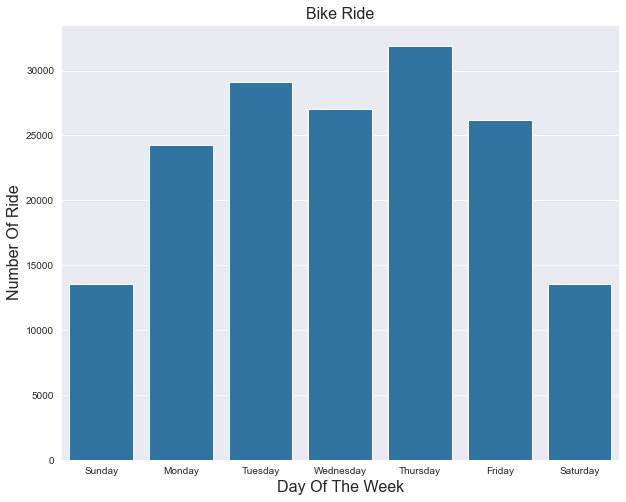

In [32]:
#Creating visuals to answer my question
base_color = sns.color_palette()[0]
day_name = ["Sunday", "Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
plt.figure(figsize=(10,8))
sns.countplot(data=FGB, x= 'day', color=base_color, order=day_name)
plt.title('Bike Ride', fontsize=16)
plt.ylabel('Number Of Ride', fontsize=16)
plt.xlabel('Day Of The Week', fontsize=16);

 #### The most trips were taken on Thursday

 ### What is the top 10 Start Station with the most Rides?

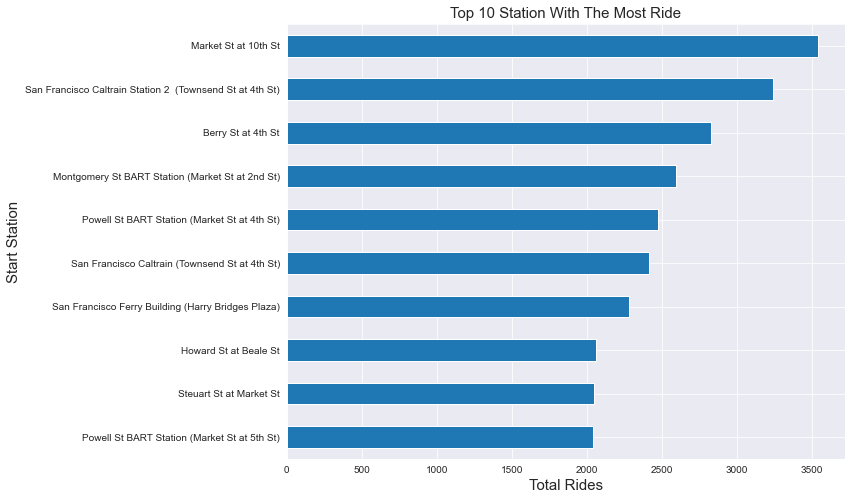

In [33]:
plt.figure(figsize=(10,8))
FGB['start_station_name'].value_counts().head(10).plot.barh()
plt.gca().invert_yaxis()
plt.title('Top 10 Station With The Most Ride', fontsize=15)
plt.ylabel('Start Station', fontsize=15)
plt.xlabel('Total Rides', fontsize=15);

 #### Observation: Market Street at 10th Street had the highest Bike Trips

 ### What is the top 10 Start Station with the least Rides ?

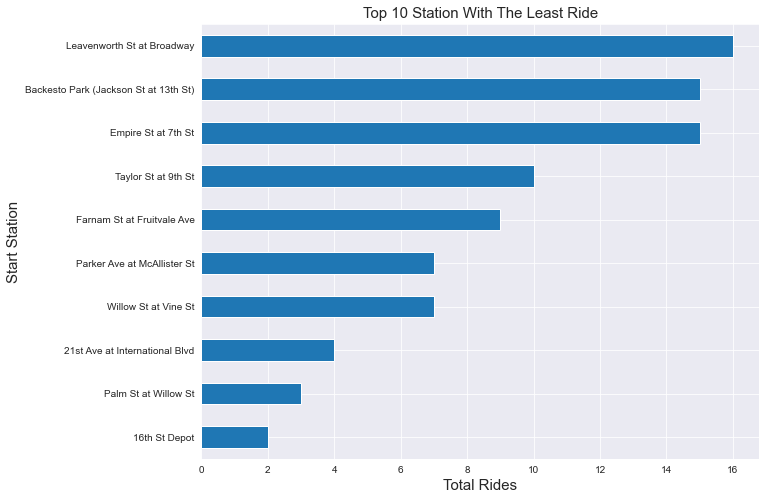

In [34]:
plt.figure(figsize=(10,8))
FGB['start_station_name'].value_counts().tail(10).plot.barh()
plt.gca().invert_yaxis()
plt.title('Top 10 Station With The Least Ride', fontsize=15)
plt.ylabel('Start Station', fontsize=15)
plt.xlabel('Total Rides', fontsize=15);

 #### Observation: 16th Street Depot had the lowest bike trips 

 ### The top 10 End Station with the most Rides?

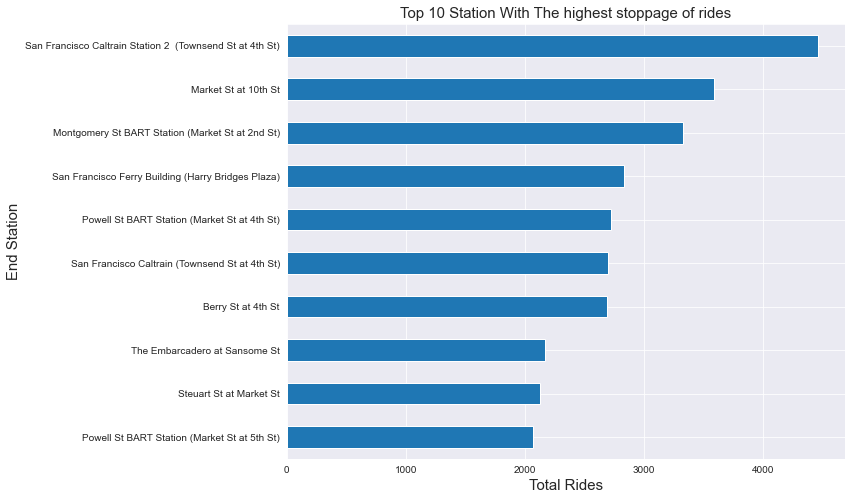

In [35]:
plt.figure(figsize=(10,8))
FGB['end_station_name'].value_counts().head(10).plot.barh()
plt.gca().invert_yaxis()
plt.title('Top 10 Station With The highest stoppage of rides', fontsize=15)
plt.ylabel('End Station', fontsize=15)
plt.xlabel('Total Rides', fontsize=15);

 #### Observation: Most rides terminated at San Francisco Caltrain Station 2 which means people visit there alot

 ### The top 10 End Station with the least Rides?

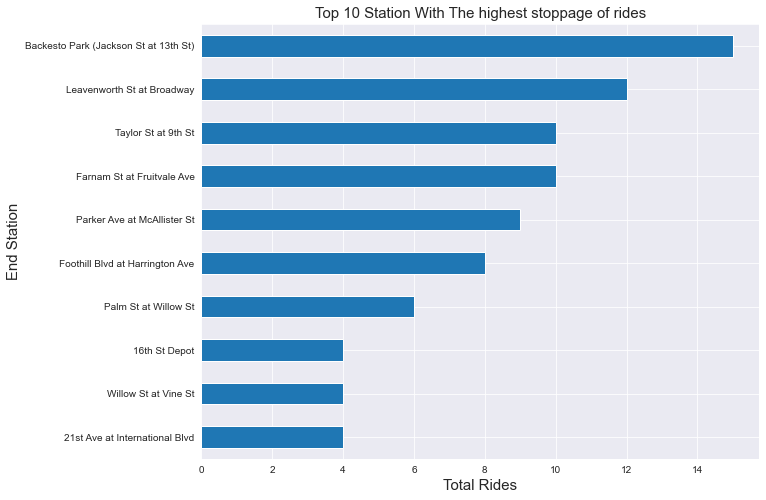

In [36]:
plt.figure(figsize=(10,8))
FGB['end_station_name'].value_counts().tail(10).plot.barh()
plt.gca().invert_yaxis()
plt.title('Top 10 Station With The highest stoppage of rides', fontsize=15)
plt.ylabel('End Station', fontsize=15)
plt.xlabel('Total Rides', fontsize=15);

 #### Observation: The station with the least stoppage of rides is Willow Street at Vine Street which means people hardly go there 

### The most bicycle service users?

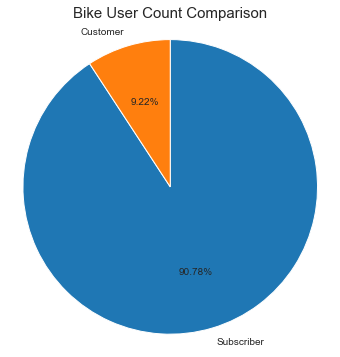

In [37]:
plt.figure(figsize=(10,6))
sorted_counts = FGB['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, autopct='%1.2f%%');
plt.axis('square')
plt.title('Bike User Count Comparison', fontsize=15);

#### Observation: We have more of the subscriber  users than that of customers 

 ### Which member gender had the most distribution?

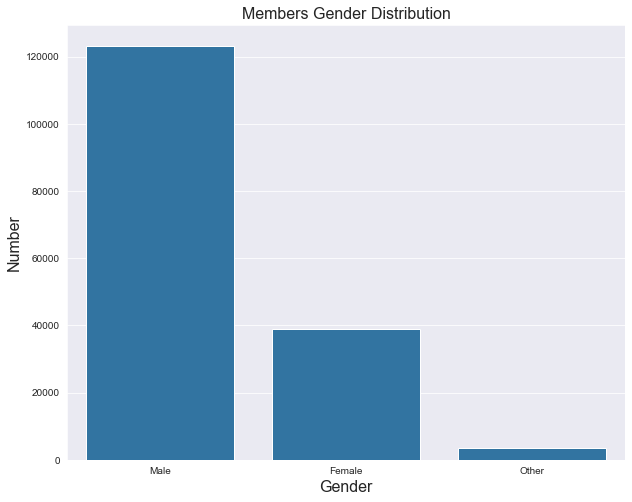

In [38]:
plt.figure(figsize=(10,8))
sns.countplot(data=FGB, x='member_gender', color=base_color)
plt.title('Members Gender Distribution', fontsize=16)
plt.ylabel('Number', fontsize=16)
plt.xlabel('Gender', fontsize=16);

 ####  Observation: We have more of the Male users than that of Females and Others 

 ## What is the rate at which users shared their bikes during their trips ?

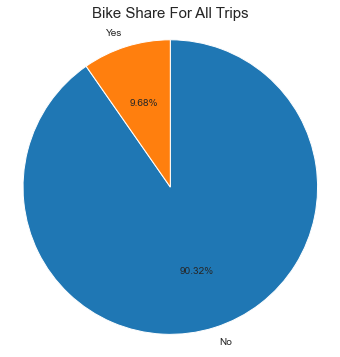

In [39]:
plt.figure(figsize=(10,6))
sorted_counts = FGB['bike_share_for_all_trip'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, autopct='%1.2f%%');
plt.axis('square')
plt.title('Bike Share For All Trips', fontsize=15);

 #### Observation: From the pie chart above we can say we have more users who used their bikes for their rides and didnt share

 ## Bivariate Exploration

 ### What is the relationship between the member_gender and the user_type ?

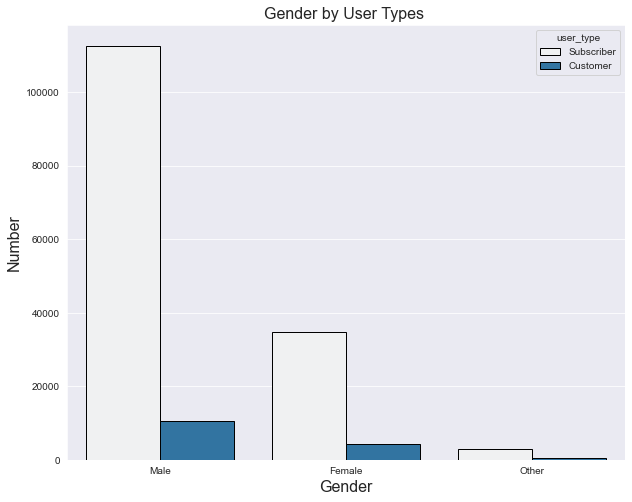

In [40]:
#Creating a barchart
plt.figure(figsize=(10,8))
sns.countplot(data=FGB, x='member_gender', color=base_color, hue='user_type', edgecolor='black')
plt.title('Gender by User Types ', fontsize=16)
plt.ylabel('Number', fontsize=16)
plt.xlabel('Gender', fontsize=16);

 #### Observation: We have more of male than female based on the user type

 ### What is the relationship between the duration and age ?

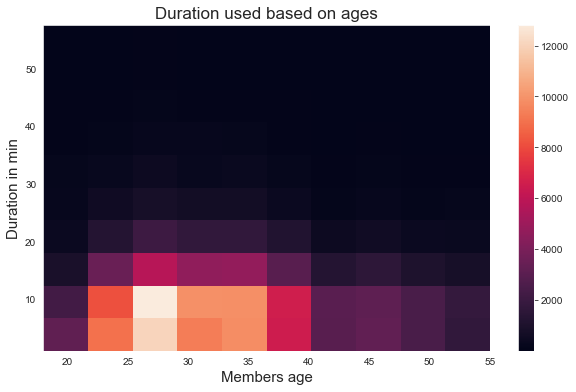

In [41]:
#Creating a heatmap
plt.figure(figsize = (10,6))
plt.hist2d(data = FGB, x = 'member_age', y = 'duration_min')
plt.xlabel('Members age', fontsize = 15)
plt.ylabel('Duration in min', fontsize = 15)
plt.title('Duration used based on ages', fontsize = 17)
plt.colorbar();

 #### Observation: The ages from 25-30 yrs spent more time as users

 ### What is the variability Of Age Distribution?

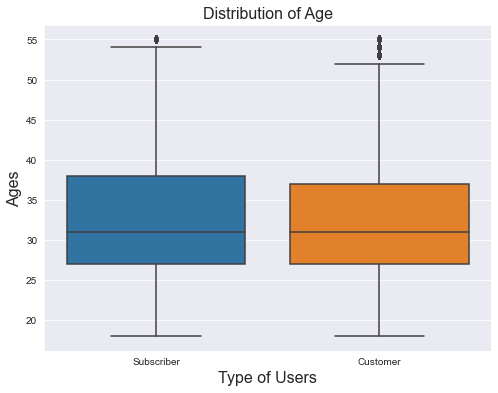

In [42]:
plt.figure(figsize=(8,6))
sns.boxplot(data=FGB, x='user_type', y='member_age')
plt.title('Distribution of Age', fontsize=16)
plt.ylabel('Ages', fontsize=16)
plt.xlabel('Type of Users', fontsize=16);

 #### Observation: there is less variability in the age distribution of the customer than the age distribution of the subscriber

 ### Which gender went on a trip most in the days of the week ? and what day is that?

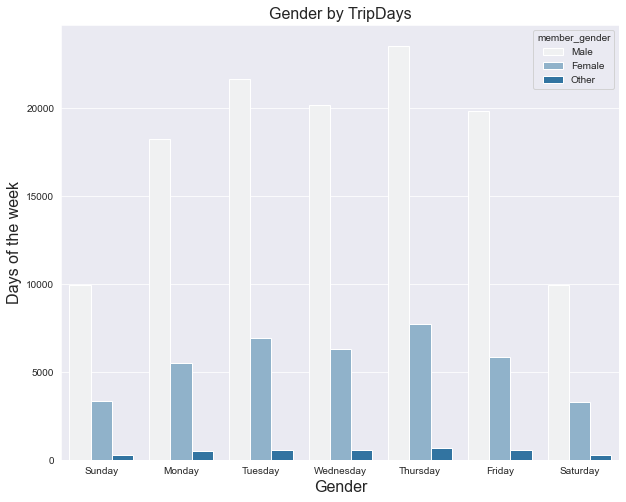

In [43]:
plt.figure(figsize=(10,8))
sns.countplot(data=FGB, x='day', color=base_color, hue='member_gender', order = day_name)
plt.title('Gender by TripDays', fontsize=16)
plt.ylabel('Days of the week', fontsize=16)
plt.xlabel('Gender', fontsize=16);

 #### Observation: We have more male who go out on thursday and more females who also go out on thursdays

 ### Multivariate Exploration

 ### What is the distribution of Member Age by day based on Gender ?

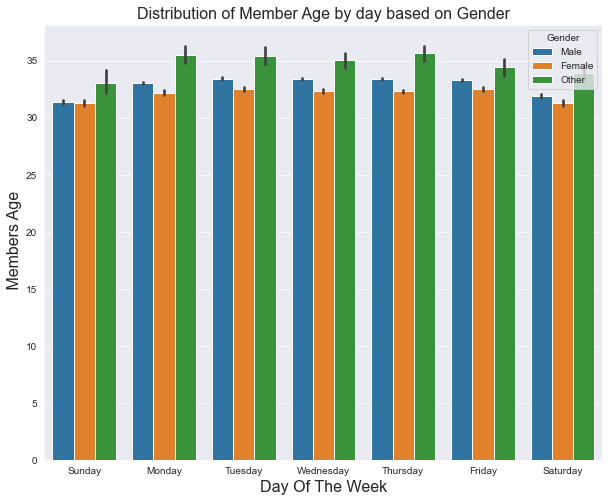

In [44]:
plt.figure(figsize=(10,8))
sns.barplot(x='day', y='member_age', data=FGB, hue='member_gender', order=day_name)
plt.legend(loc='upper right', title="Gender")
plt.title('Distribution of Member Age by day based on Gender', fontsize=16)
plt.xlabel('Day Of The Week', fontsize=16)
plt.ylabel(' Members Age', fontsize=16);

 #### Observation: The barplot indicates that the oldest rider on any given day of the week is always the  other gender

 ### What is the relationship between the member_gender, duration_minutes and user_type ?

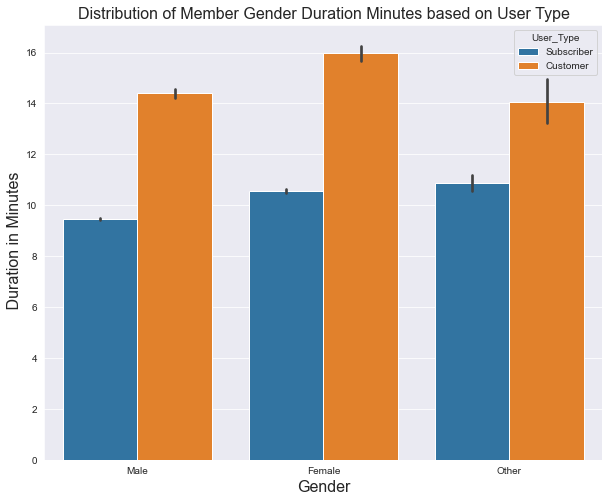

In [45]:
plt.figure(figsize=(10,8))
sns.barplot(x='member_gender', y='duration_min', data=FGB, hue='user_type')
plt.legend(loc='upper right', title="User_Type")
plt.title('Distribution of Member Gender Duration Minutes based on User Type', fontsize=16)
plt.xlabel('Gender', fontsize=16)
plt.ylabel(' Duration in Minutes', fontsize=16);

 #### Observation: We have more of the customer users than subscriber in terms of gender

 ### Is there a relationship Between the numerical values ?

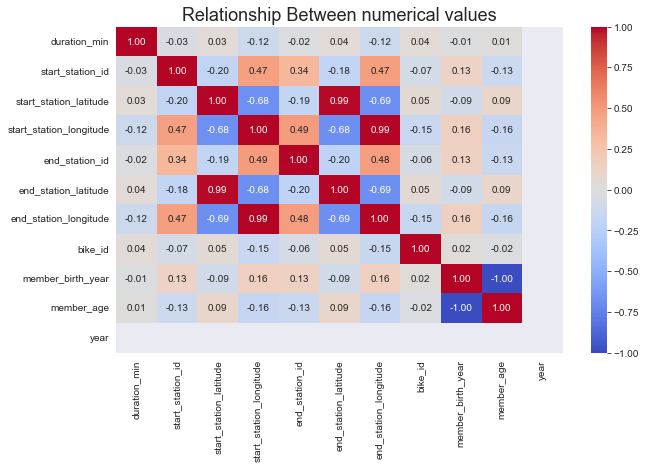

In [46]:
plt.figure(figsize = (10, 6))
sns.heatmap(FGB.corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')
plt.title('Relationship Between numerical values', fontsize = 18)
plt.show();

 #### Observation: The start_station_latitude and the start_station_longitude got correlated negatively with a correlation coefficient of 0.68

 ## Conclusions
 - After our analysis, it became obvious to us that Thursday tends to be the day with the most trips and it is the male gender that goes out more on a trip on that particular day.
 - It was also observed that the start station with the most ride is Market Street at 10th Street which tells us that the services rendered their on getting a successful trip is high.
 - Also a pattern was traced that lead us to figure out that we have more user of the subscribers than that of the customers which shows that the subscribers are member users and the customers are casual users.
 - Finally it was discovered that most of the subscribers are mostly the male gender.